In [1]:
# @title Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("/content/Advertising.csv")

In [3]:
# @title Data Exploration
print("Exploring the dataset:")
print(data.head())

Exploring the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [5]:
print(data.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [7]:
# @title Data Preprocessing
# Splitting data into features (X) and target variable (y)
X = data.drop(columns=["Sales"])  # Features: TV, Radio, Newspaper
y = data["Sales"]  # Target variable

In [8]:
# @title Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# @title Model Training and Evaluation
# Model Training and Evaluation for TV
model_tv = RandomForestRegressor(n_estimators=100, random_state=42)
model_tv.fit(X_train[['TV']], y_train)
y_pred_train_tv = model_tv.predict(X_train[['TV']])
y_pred_test_tv = model_tv.predict(X_test[['TV']])
test_rmse_tv = mean_squared_error(y_test, y_pred_test_tv, squared=False)
r2_test_tv = r2_score(y_test, y_pred_test_tv)

In [17]:
# Model Training and Evaluation for Radio
model_radio = RandomForestRegressor(n_estimators=100, random_state=42)
model_radio.fit(X_train[['Radio']], y_train)
y_pred_train_radio = model_radio.predict(X_train[['Radio']])
y_pred_test_radio = model_radio.predict(X_test[['Radio']])
test_rmse_radio = mean_squared_error(y_test, y_pred_test_radio, squared=False)
r2_test_radio = r2_score(y_test, y_pred_test_radio)

In [18]:
# Model Training and Evaluation for Newspaper
model_newspaper = RandomForestRegressor(n_estimators=100, random_state=42)
model_newspaper.fit(X_train[['Newspaper']], y_train)
y_pred_train_newspaper = model_newspaper.predict(X_train[['Newspaper']])
y_pred_test_newspaper = model_newspaper.predict(X_test[['Newspaper']])
test_rmse_newspaper = mean_squared_error(y_test, y_pred_test_newspaper, squared=False)
r2_test_newspaper = r2_score(y_test, y_pred_test_newspaper)

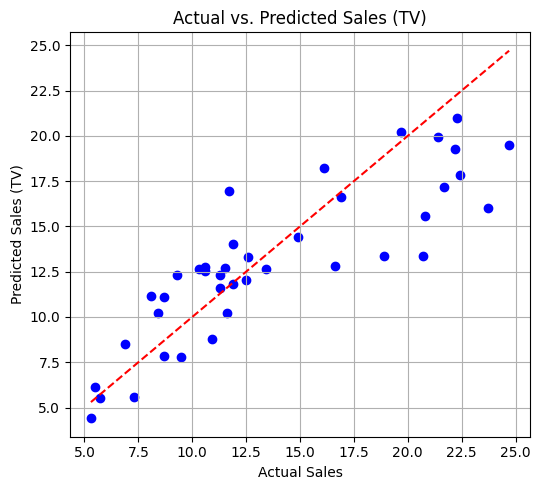

In [40]:
# Plotting actual vs. predicted sales for TV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test_tv, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (TV)')
plt.title('Actual vs. Predicted Sales (TV)')
plt.grid(True)
plt.tight_layout()
plt.show()

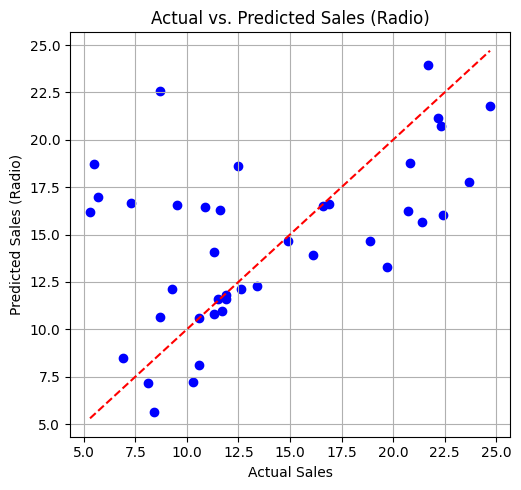

In [39]:

# Plotting actual vs. predicted sales for Radio
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test_radio, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (Radio)')
plt.title('Actual vs. Predicted Sales (Radio)')
plt.grid(True)
plt.tight_layout()
plt.show()

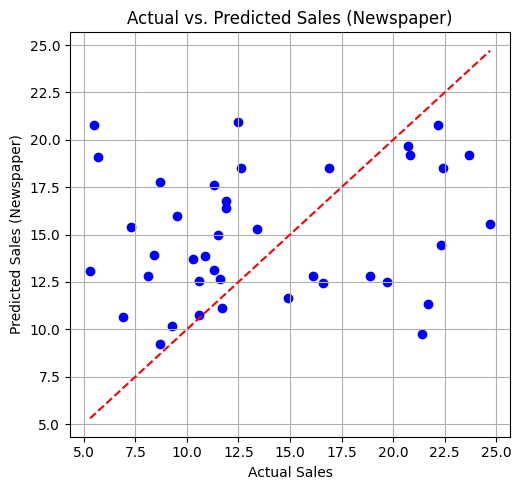

In [38]:
# Plotting actual vs. predicted sales for Newspaper
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_test_newspaper, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (Newspaper)')
plt.title('Actual vs. Predicted Sales (Newspaper)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Comparing the performance
print("Test RMSE for TV:", test_rmse_tv)
print("R-squared for TV:", r2_test_tv)
print("\nTest RMSE for Radio:", test_rmse_radio)
print("R-squared for Radio:", r2_test_radio)
print("\nTest RMSE for Newspaper:", test_rmse_newspaper)
print("R-squared for Newspaper:", r2_test_newspaper)

Test RMSE for TV: 3.017054389029325
R-squared for TV: 0.7116102412653466

Test RMSE for Radio: 5.254200093226062
R-squared for Radio: 0.12536516474278958

Test RMSE for Newspaper: 6.173140667201752
R-squared for Newspaper: -0.20732974828191408


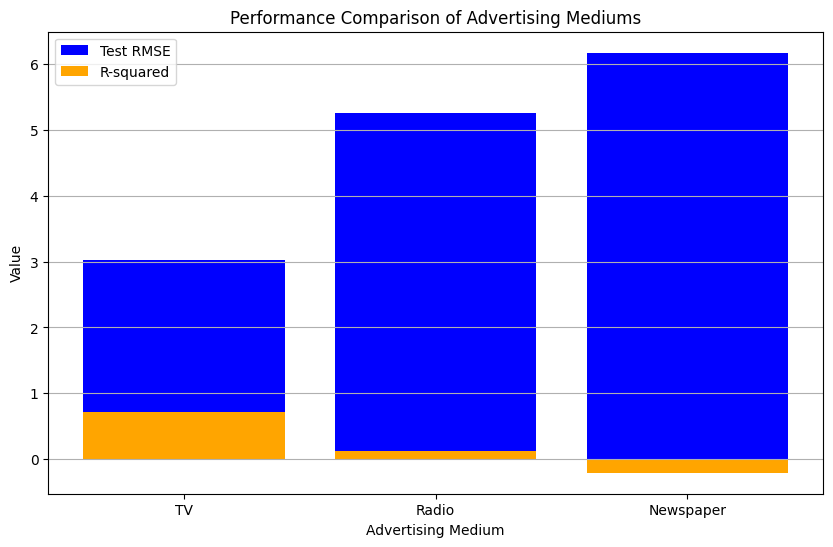

In [42]:
# Test RMSE and R-squared values for each medium
test_rmse_values = [3.017054389029325, 5.254200093226062, 6.173140667201752]
r2_values = [0.7116102412653466, 0.12536516474278958, -0.20732974828191408]
mediums = ['TV', 'Radio', 'Newspaper']

# Creating bar plot
plt.figure(figsize=(10, 6))
plt.bar(mediums, test_rmse_values, color='blue', label='Test RMSE')
plt.bar(mediums, r2_values, color='orange', label='R-squared')
plt.xlabel('Advertising Medium')
plt.ylabel('Value')
plt.title('Performance Comparison of Advertising Mediums')
plt.legend()
plt.grid(axis='y')
plt.show()